
Dataset: Fashion-MNIST

Trained on: Randomly-Colored-Fashion-MNIST

Tested on: Fashion-MNIST

Model: CNN with 2 Conv Layers, 2 Max Pooling Layers, and 2 Fully Connected Layers


In [1]:
import os


os.chdir('../../experiments')

# print("Current working directory:", os.getcwd())

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Load dataset

In [3]:

directory = "../data"
files = os.listdir(directory)
files

['CustomColoredFashionMNIST', 'FashionMNIST', 'MNIST']

In [4]:
grey_transform = transforms.Compose([
    # Convert grayscale to 3-channel RGB
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize for 3 channels

])

In [5]:
class RandomColorize:
    def __call__(self, img):
        # Split the single channel into 3 identical channels
        img = F.to_tensor(img)  # Convert to tensor
        img = img.repeat(3, 1, 1)  # Duplicate grayscale channel to 3 channels

        # Apply random scaling to each channel
        r, g, b = random.uniform(0.6, 1.4), random.uniform(
            0.6, 1.4), random.uniform(0.6, 1.4)
        img[0] *= r
        img[1] *= g
        img[2] *= b

        # Clip values to the range [0, 1]
        img = torch.clamp(img, 0, 1)
        return img

In [6]:
color_transform = transforms.Compose([
    RandomColorize(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
                         )  # Normalize 3 channels
])

In [7]:
train_batch_size = 64
test_batch_size = 128

In [8]:
colored_train_dataset = datasets.FashionMNIST(
    root=directory, train=True, transform=color_transform, download=True)
colored_train_loader = DataLoader(
    colored_train_dataset, batch_size=train_batch_size, shuffle=False)

colored_test_dataset = datasets.FashionMNIST(
    root=directory, train=False, transform=color_transform, download=True)
colored_test_loader = DataLoader(
    colored_test_dataset, batch_size=test_batch_size, shuffle=False)

In [9]:
grey_train_dataset = datasets.FashionMNIST(
    directory, train=True, download=True, transform=grey_transform)

grey_test_dataset = datasets.FashionMNIST(
    directory, train=False, transform=grey_transform)

grey_train_loader = DataLoader(
    grey_train_dataset, batch_size=train_batch_size, shuffle=True)
grey_test_loader = DataLoader(
    grey_test_dataset, batch_size=test_batch_size, shuffle=False)

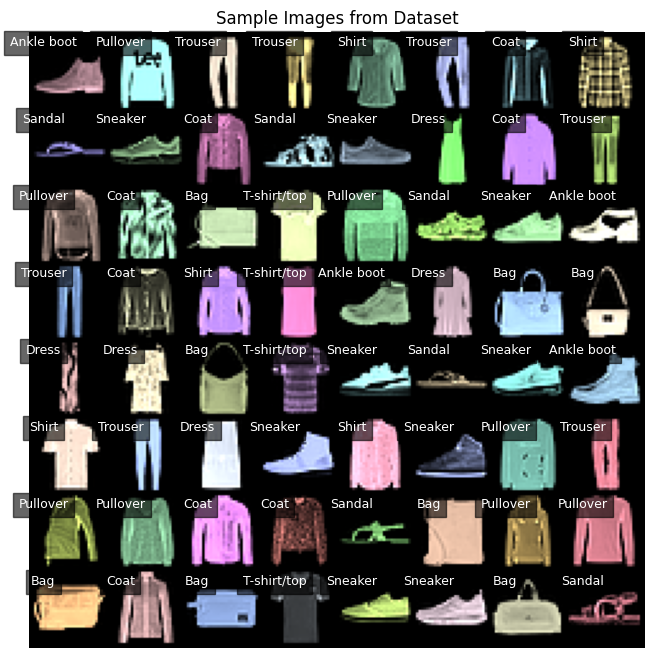

In [10]:
fashion_mnist_classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


def show_images_from_loader(loader, classes=fashion_mnist_classes, n_images=64):

    # Get a batch of images and labels
    images, labels = next(iter(loader))

    # Select n_images from the batch
    images, labels = images[:n_images], labels[:n_images]

    # Create a grid of images
    grid = utils.make_grid(images, nrow=int(
        n_images**0.5), padding=2, normalize=True)

    plt.figure(figsize=(8, 8))
    # Convert from (C, H, W) to (H, W, C) for plotting
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')
    plt.title("Sample Images from Dataset")

    for i, label in enumerate(labels):
        row, col = divmod(i, int(n_images**0.5))
        plt.text(col * (grid.size(2) / n_images**0.5) + 5,
                 row * (grid.size(1) / n_images**0.5) + 5,
                 classes[label.item()],
                 color='white', fontsize=9, ha='center', bbox=dict(facecolor='black', alpha=0.6))
    plt.show()


show_images_from_loader(colored_test_loader)

Train on the randomly colored fashion-mnist dataset

In [11]:
from train import train, test
from cnn import _2LayerCNN

In [12]:
model = _2LayerCNN().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [13]:
for epoch in range(1, 5):
    train(model, device, colored_train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303188
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.580046
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.283476
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.450185
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.422686
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.447047
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.291649
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.468251
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.370420
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.312712
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.206130
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.274961
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.202047
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.313457
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.415614
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.412964
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.232598
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.360863
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.262956
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.240162
Train Epoch:

In [14]:
test(model, device, colored_test_loader)


Test set: Average loss: 0.0023, Accuracy: 8980/10000 (89.80%)



In [15]:
test(model, device, grey_test_loader)


Test set: Average loss: 0.0022, Accuracy: 9002/10000 (90.02%)

